In [112]:
# Solar Radiation Prediction (https://www.kaggle.com/datasets/dronio/SolarEnergy)
# Предметная область - Солнечная радиация
# Источник данных - Метеостанция HI-SEAS
# Характер данных - реальные

# Атрибуты датасета:
# UNIXTime - время в формате unix
# Radiation - солнечная радиация, измеренная в вт/м^2
# Temperature - температура воздуха, измеренная в Фаренгейтах
# Pressure - атмосферное давление, измеренное в мм.рт.ст.
# Humidity - относительная влажность воздуха, измеренная в процентах
# WindDirection(Degrees) - направление ветра, измеренное в градусах от северного направления
# Speed - скорость ветра, измеренная в милях/час

# Основной задачей анализа является прогнозирование солнечной радиации на основе метеорологических данных

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

csv = pd.read_csv('SolarPrediction.csv', sep=',')
df = pd.DataFrame(csv)[['UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']]

UNIXTime
  Среднее значение = 1478047264.94
  Среднеквадратическое отклонение = 3005036.64
  Пропущенных значений: 0


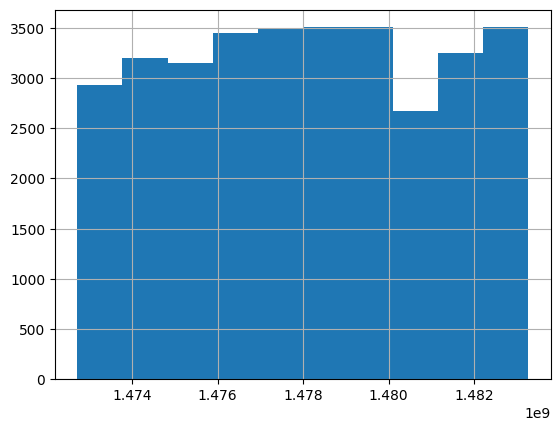

Radiation
  Среднее значение = 207.12
  Среднеквадратическое отклонение = 315.92
  Пропущенных значений: 0


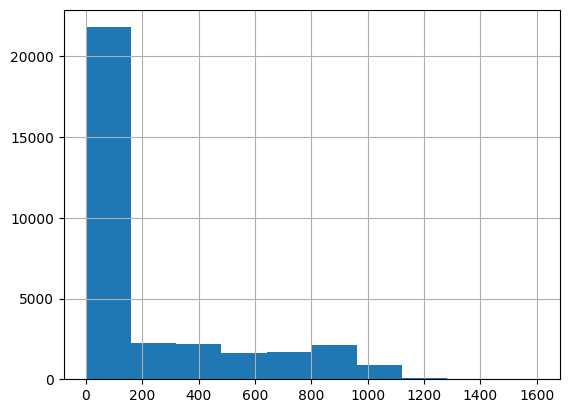

Temperature
  Среднее значение = 51.10
  Среднеквадратическое отклонение = 6.20
  Пропущенных значений: 0


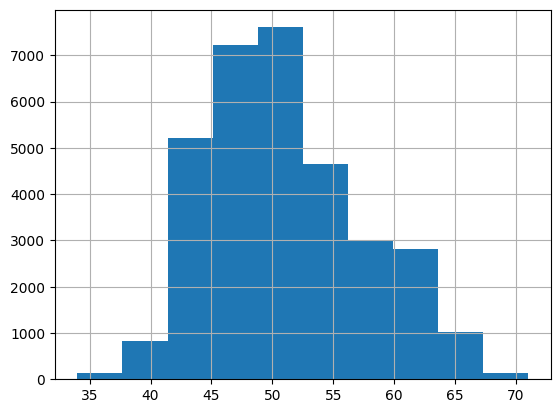

Pressure
  Среднее значение = 30.42
  Среднеквадратическое отклонение = 0.05
  Пропущенных значений: 0


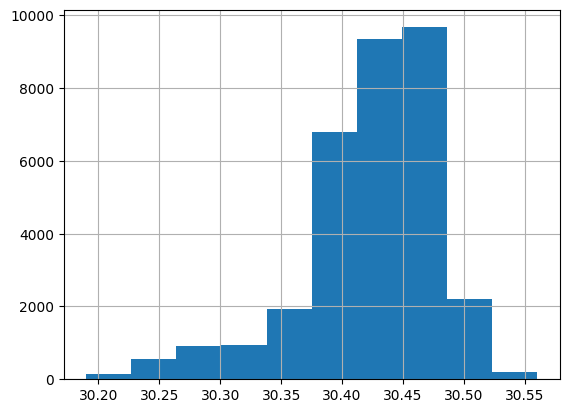

Humidity
  Среднее значение = 75.02
  Среднеквадратическое отклонение = 25.99
  Пропущенных значений: 0


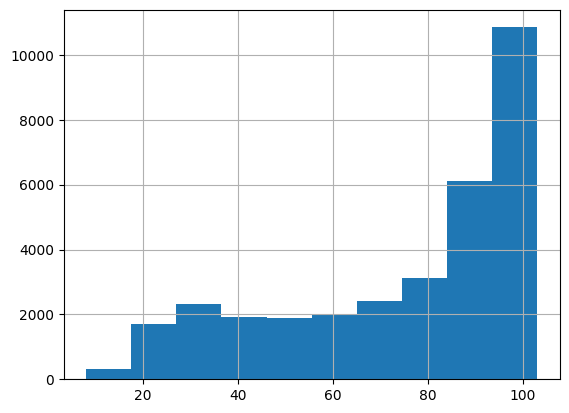

WindDirection(Degrees)
  Среднее значение = 143.49
  Среднеквадратическое отклонение = 83.17
  Пропущенных значений: 0


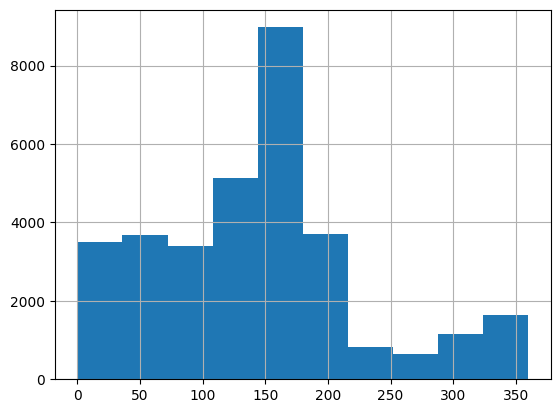

Speed
  Среднее значение = 6.24
  Среднеквадратическое отклонение = 3.49
  Пропущенных значений: 0


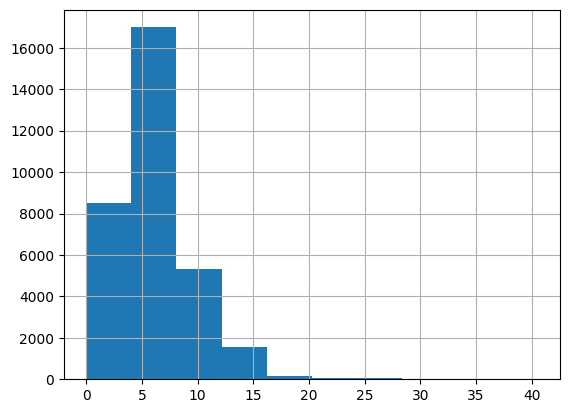

In [113]:
for column in df.columns:
    print(f'{column}\n  Среднее значение = {df[column].mean():.2f}\n  Среднеквадратическое отклонение = {df[column].std():.2f}')
    print(f'  Пропущенных значений: {df[column].isnull().sum()}')
    df[column].hist()
    plt.show()

# Судя по графикам выбросы отсутствуют, значения находятся в пределах нормы

# Атрибуты не имеют пропущенных значений

In [114]:
print('Коэффициенты корреляции относительно столбца Radiation:')
print(df.corr()['Radiation']) # Матрица коэффициентов корреляции

# Высококоррелированые атрибуты по отношению к радиации: температура
# Менее выраженная корреляция: направление ветра, влажность
# Корреляция почти отсутствует: время, давление, скорость ветра

Коэффициенты корреляции относительно столбца Radiation:
UNIXTime                 -0.081286
Radiation                 1.000000
Temperature               0.734955
Pressure                  0.119016
Humidity                 -0.226171
WindDirection(Degrees)   -0.230324
Speed                     0.073627
Name: Radiation, dtype: float64


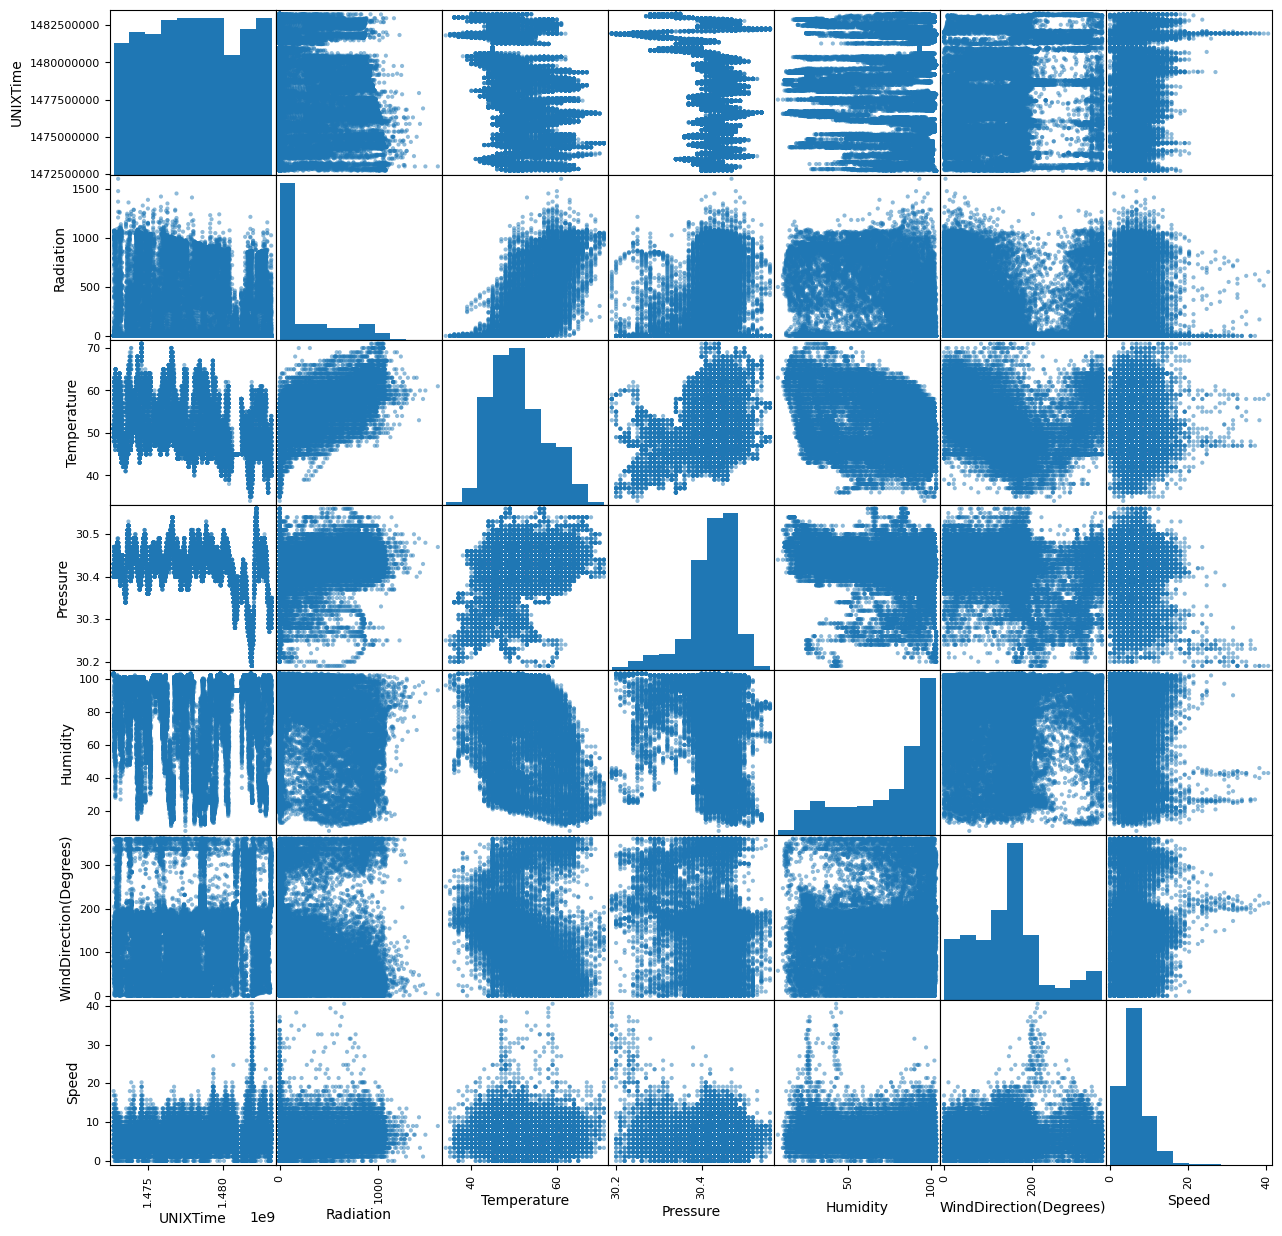

In [115]:
scatter_matrix(df,figsize=(15, 15)) # Матрица графиков рассеивания
plt.show()

In [116]:
# Рассмотрим корреляции и графики рассеивания между радиацией и остальными атрибутами

# UNIXTime
# Измерения проводились с сентября по декабрь, в этот период 
# значения радиации незначительно уменьшались со временем (коэффициент корреляции = -0.081)
# В конце ноября/начале декабря значения радиации не превышали 500 

# Temperature
# При значениях выше 45 градусов Фаренгейта радиация начинает значительно возрастать
# Имеет практически линейную зависимость (коэффициент корреляции = 0.735)

# Pressure
# При значениях выше 30.3 радиация начинает возрастать, но затем закрепляется на одном уровне
# По этой причине коэффициент корреляции не столь высок (0.119)

# Humidity
# При увеличении влажности уровень радиация снижается, но не столь значительно (коэффициент корреляции = -0.226)

# WindDirection(Degrees)
# Строить корреляционные зависимости относительно этого параметра не совсем логично, но судя по графику
# рассеивания можно отметить, что при юго-западном ветре значения радиации становятся меньше, что
# в свою очередь можно объяснить малым количеством измерений в этом диапазоне

# Speed
# При увеличении скорости ветра радиация незначительно возрастает (коэффициент корреляции = 0.074)